In [28]:
import pandas as pd
twitter_data = pd.read_csv('/Users/sarathrnair/Sarath_works/Cfloor/cfloor_flask/sts_gold_v03 2/twitter.csv')


In [17]:
twitter_data.groupby('polarity').size()

polarity
0    1402
4     632
dtype: int64

In [64]:

import re
import nltk
from nltk.corpus import stopwords

stopwords = set(stopwords.words("english"))

at_remove = re.compile(ur'@[_\s]{0,2}[a-zA-Z\d_]+\s{1}')
extra_remove = re.compile(ur"[^a-zA-Z]")
def remove_at(text):
    twitter_preprocessed = []
    for sent in text:
        
        prep_sent = re.sub(at_remove,'',sent)
        prep_sent = re.sub(extra_remove,' ',prep_sent)
        twitter_preprocessed.append(prep_sent)
    return twitter_preprocessed  


def tokenize(text, final_tokens = False):
    
    tokenized_twitter = []
    for sent in text:
        
        tokens = nltk.word_tokenize(sent)
      
        final_tokens = [w.lower() for w in tokens if not w in stopwords and  len(w)>1]
        
        tokenized_twitter.append(final_tokens)
    return tokenized_twitter    
        

twitter_preprocess = remove_at(twitter_data.tweet)  
twitter_tokens = tokenize(twitter_preprocess)
        

In [68]:
twitter_token_sent = [' '.join(sent) for sent in twitter_tokens]

In [69]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
train_data_features = count_vect.fit_transform(twitter_token_sent)

In [90]:
train_features = train_data_features.toarray()

In [251]:
# vocab = count_vect.get_feature_names()
# import numpy as np

# dist = np.sum(train_data_features, axis=0)

# for tag,count in zip(vocab, dist):
#     print count, tag

multiple_str_count = []
for sent in twitter_preprocess:
    
    match = re.match(ur'(\w*([a-z])\2+\w*)',sent,re.IGNORECASE)
    if match:
        multiple_str_count.append(1)
    else:
        multiple_str_count.append(0)
        
len(multiple_str_count)        

2034

In [221]:
X = pd.DataFrame(train_features)


In [222]:
X = pd.concat([twitter_data.id,X,twitter_data.polarity],axis=1)

In [223]:
X = X.iloc[np.random.permutation(np.arange(len(X)))]
print X.shape
print X.columns

(2034, 4604)
Index([      u'id',           0,           1,           2,           3,
                 4,           5,           6,           7,           8, 
       ...
              4593,        4594,        4595,        4596,        4597,
              4598,        4599,        4600,        4601, u'polarity'],
      dtype='object', length=4604)


In [224]:
from sklearn.linear_model import LogisticRegression

from sklearn.cross_validation import train_test_split

from sklearn.metrics import accuracy_score


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix

X_Data = X
Y = X.polarity
X = X.drop(['polarity','id'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)


In [225]:
rf = RF()
rf_model = rf.fit(X_train, Y_train)
predicted = rf_model.predict(X_test)
np.mean(predicted == Y_test)

0.72504091653027825

In [226]:
from sklearn.metrics import classification_report
target_names = ['0','1']
print(classification_report(Y_test, predicted, target_names=target_names))

             precision    recall  f1-score   support

          0       0.76      0.88      0.82       424
          1       0.58      0.38      0.46       187

avg / total       0.71      0.73      0.71       611



[[372  52]
 [116  71]]


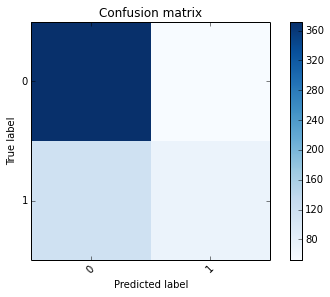

In [227]:
%matplotlib inline
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_test, predicted)

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm)    
print cm

0.633387888707
             precision    recall  f1-score   support

          0       0.77      0.66      0.71       413
          1       0.45      0.59      0.51       198

avg / total       0.66      0.63      0.64       611

[[271 142]
 [ 82 116]]


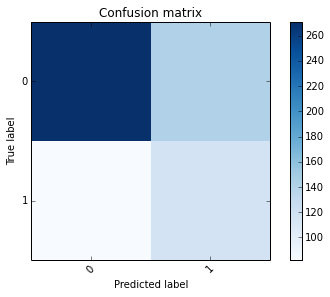

In [159]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
model = gb.fit(X_train, Y_train)
predicted = model.predict(X_test)
print np.mean(Y_test == predicted)
target_names = ['0','1']

print(classification_report(Y_test, predicted, target_names=target_names))
cm = confusion_matrix(Y_test, predicted)
plot_confusion_matrix(cm)    
print cm


In [173]:
##### Word to Vec

punkt_tokenizer = tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def tokenize(text, final_tokens = False):
    
    
    tokens = nltk.word_tokenize(text)
    print tokens
        
      
        
    return tokens  

tokenizer_input = []
for sent in twitter_preprocess:
    
   
    
    tokenizer_input.append(tokenize(sent, final_tokens = False))

    
print tokenizer_input

['the', 'angel', 'is', 'going', 'to', 'miss', 'the', 'athlete', 'this', 'weekend']
['It', 'looks', 'as', 'though', 'Shaq', 'is', 'getting', 'traded', 'to', 'Cleveland', 'to', 'play', 'w', 'LeBron', 'Too', 'bad', 'for', 'Suns', 'fans', 'The', 'Big', 'Cactus', 'is', 'no', 'more']
['APRIL', 'TH', 'ISN', 'T', 'COMING', 'SOON', 'ENOUGH']
['drinking', 'a', 'McDonalds', 'coffee', 'and', 'not', 'understanding', 'why', 'someone', 'would', 'hurt', 'me', 'for', 'no', 'apparent', 'reason']
['So', 'dissapointed', 'Taylor', 'Swift', 'doesnt', 'have', 'a', 'Twitter']
['Wishes', 'I', 'was', 'on', 'the', 'Spring', 'Fling', 'Tour', 'with', 'Dawn', 'amp', 'neecee', 'Sigh', 'G', 'knight']
['got', 'a', 'sniffle', 'got', 'the', 'kids', 'and', 'hubby', 'just', 'left', 'to', 'work', 'in', 'Sydney', 'for', 'the', 'weekend', 'boo', 'hoo']
['i', 've', 'only', 'been', 'in', 'sydney', 'for', 'hrs', 'but', 'I', 'miss', 'my', 'friends', 'especially', 'ktjade']
['xboxtweet', 'not', 'working', 'again']
['R', 'I', 'P',

In [175]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 100    # Word vector dimensionality                      
min_word_count = 5   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print "Training model..."
model = word2vec.Word2Vec(tokenizer_input, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save('/Users/sarathrnair/Sarath_works/Cfloor/cfloor_flask/300features_40minwords_10context')

Training model...


In [177]:
model.doesnt_match("man woman child kitchen".split())

'man'

In [189]:
model.most_similar('bad')

[('that', 0.9846360683441162),
 ('be', 0.9837604761123657),
 ('like', 0.9831854701042175),
 ('think', 0.9824507832527161),
 ('but', 0.9821674227714539),
 ('have', 0.982093095779419),
 ('i', 0.9819587469100952),
 ('on', 0.981770932674408),
 ('all', 0.9817110300064087),
 ('was', 0.9815559387207031)]

In [190]:
model.syn0.shape

(829, 100)

In [210]:
def makeFeatureVec(words, model, num_features):
    # Function to average all of the word vectors in a given
    # paragraph
    #
    # Pre-initialize an empty numpy array (for speed)
    featureVec = np.zeros((num_features,),dtype="float32")
    #
    nwords = 0.
    # 
    # Index2word is a list that contains the names of the words in 
    # the model's vocabulary. Convert it to a set, for speed 
    index2word_set = set(model.index2word)
    #
    # Loop over each word in the review and, if it is in the model's
    # vocaublary, add its feature vector to the total
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])
    # 
    # Divide the result by the number of words to get the average
    featureVec = np.divide(featureVec,nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):
    # Given a set of reviews (each one a list of words), calculate 
    # the average feature vector for each one and return a 2D numpy array 
    # 
    # Initialize a counter
    counter = 0.
    # 
    # Preallocate a 2D numpy array, for speed
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    # 
    # Loop through the reviews
    for review in reviews:
        #
        # Print a status message every 1000th review
        if counter%1000. == 0.:
            print "Review %d of %d" % (counter, len(reviews))
        # 
        # Call the function (defined above) that makes average feature vectors
        reviewFeatureVecs[counter] = makeFeatureVec(review, model, num_features)
       
       # Increment the counter
        counter = counter + 1.
    return reviewFeatureVecs


trainDataVecs = getAvgFeatureVecs( tokenizer_input, model, num_features )


Review 0 of 2034
Review 1000 of 2034
Review 2000 of 2034


In [232]:
X_word_vec = pd.DataFrame(trainDataVecs)

In [234]:
X_word_vec = pd.concat([X_word_vec,twitter_data.polarity], axis=1)

In [249]:
X_word_vec = X_word_vec.iloc[np.random.permutation(np.arange(len(X_word_vec)))]
X_word_vec.dropna(axis=0, inplace=True)
X_word_vec.shape

(2029, 101)

Accuracy 0.71921182266
             precision    recall  f1-score   support

          0       0.75      0.91      0.82       432
          1       0.54      0.25      0.34       177

avg / total       0.69      0.72      0.68       609

[[393  39]
 [132  45]]


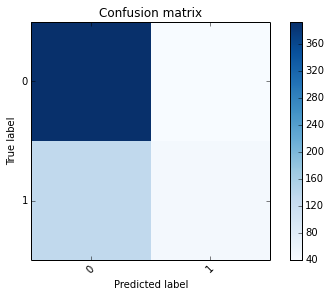

In [250]:
YY = X_word_vec.polarity
XX = X_word_vec.drop('polarity', axis = 1)

XX_train, XX_test, YY_train, YY_test = train_test_split(XX,YY, test_size=0.3)

rf = RF()
rf_model = rf.fit(XX_train, YY_train)
predicted = rf_model.predict(XX_test)
print 'Accuracy', np.mean(predicted == YY_test)
target_names = ['0','1']
print(classification_report(YY_test, predicted, target_names=target_names))

cm = confusion_matrix(YY_test, predicted)
    
plot_confusion_matrix(cm)    
print cm




Accuracy 0.777414075286
             precision    recall  f1-score   support

          0       0.80      0.91      0.85       428
          1       0.69      0.46      0.55       183

avg / total       0.77      0.78      0.76       611

[[391  37]
 [ 99  84]]


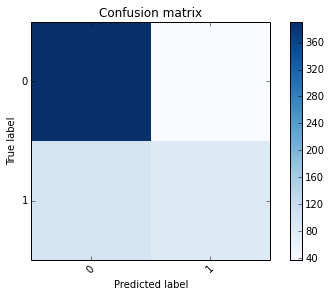

In [261]:
XXX = pd.DataFrame(train_features)
XXX = pd.concat([XXX,pd.DataFrame(multiple_str_count),twitter_data.polarity],axis=1)
YYY= XXX.polarity
XXX = XXX.drop('polarity', axis=1)
XXX_train, XXX_test, YYY_train, YYY_test = train_test_split(XXX,YYY, test_size=0.3)
rf = RF()
rf_model = rf.fit(XXX_train, YYY_train)
predicted = rf_model.predict(XXX_test)
print 'Accuracy', np.mean(predicted == YYY_test)
target_names = ['0','1']
print(classification_report(YYY_test, predicted, target_names=target_names))

cm = confusion_matrix(YYY_test, predicted)
    
plot_confusion_matrix(cm)    
print cm

In [264]:
from sklearn.externals import joblib
joblib.dump(rf_model, '/Users/sarathrnair/Sarath_works/Cfloor/cfloor_flask/sklearn_model/random_forest_sent.pkl') 

['/Users/sarathrnair/Sarath_works/Cfloor/cfloor_flask/sklearn_model/random_forest_sent.pkl',
 '/Users/sarathrnair/Sarath_works/Cfloor/cfloor_flask/sklearn_model/random_forest_sent.pkl_01.npy',
 '/Users/sarathrnair/Sarath_works/Cfloor/cfloor_flask/sklearn_model/random_forest_sent.pkl_02.npy',
 '/Users/sarathrnair/Sarath_works/Cfloor/cfloor_flask/sklearn_model/random_forest_sent.pkl_03.npy',
 '/Users/sarathrnair/Sarath_works/Cfloor/cfloor_flask/sklearn_model/random_forest_sent.pkl_04.npy',
 '/Users/sarathrnair/Sarath_works/Cfloor/cfloor_flask/sklearn_model/random_forest_sent.pkl_05.npy',
 '/Users/sarathrnair/Sarath_works/Cfloor/cfloor_flask/sklearn_model/random_forest_sent.pkl_06.npy',
 '/Users/sarathrnair/Sarath_works/Cfloor/cfloor_flask/sklearn_model/random_forest_sent.pkl_07.npy',
 '/Users/sarathrnair/Sarath_works/Cfloor/cfloor_flask/sklearn_model/random_forest_sent.pkl_08.npy',
 '/Users/sarathrnair/Sarath_works/Cfloor/cfloor_flask/sklearn_model/random_forest_sent.pkl_09.npy',
 '/User

In [265]:
clf = joblib.load('/Users/sarathrnair/Sarath_works/Cfloor/cfloor_flask/cfloor-twitter/sklearn_model/count_vector_sent.pkl') 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [276]:
joblib.dump(count_vect, '/Users/sarathrnair/Sarath_works/Cfloor/cfloor_flask/cfloor-twitter/sklearn_model/count_vector_sent.pkl') 

['/Users/sarathrnair/Sarath_works/Cfloor/cfloor_flask/cfloor-twitter/sklearn_model/count_vector_sent.pkl']

In [351]:
from collections import Counter
z = ['blue', 'red', 'blue', 'yellow', 'blue', 'red']
zz = Counter(z)

In [356]:
zz.viewkeys()

dict_keys(['blue', 'yellow', 'red'])

In [358]:
dict((i,z.count(i)) for i in z)

{'blue': 3, 'red': 2, 'yellow': 1}

In [359]:
clf = joblib.load('/Users/sarathrnair/Sarath_works/Cfloor/cfloor_flask/cfloor-twitter/sklearn_model/count_vector_sent.pkl') 

In [372]:
import pprint
false = False
true = True

null = 'null'
pprint.pprint({"created_at":"Sat May 16 13:29:11 +0000 2015","id":599567271900491776,"id_str":"599567271900491776","text":"#python wet 10: wetvoorstel voor casemanager en bewindvoering voor diegenen die niet zelfredzaam zijn. http:\/\/t.co\/rq88XYcKBq","source":"\u003ca href=\"http:\/\/dlvr.it\" rel=\"nofollow\"\u003edlvr.it\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":929084149,"id_str":"929084149","name":"Arteri Wisanggeni","screen_name":"artwisanggeni","location":"Yogyakarta","url":"http:\/\/immortal.ucoz.com","description":"We've had our share of hard times, But that's the price we paid\r\nAnd through it all we kept the promise that we made, I swear you'll never be lonely.","protected":false,"verified":false,"followers_count":176,"friends_count":61,"listed_count":67,"favourites_count":14,"statuses_count":122321,"created_at":"Tue Nov 06 05:44:46 +0000 2012","utc_offset":25200,"time_zone":"Jakarta","geo_enabled":false,"lang":"en-gb","contributors_enabled":false,"is_translator":false,"profile_background_color":"000000","profile_background_image_url":"http:\/\/pbs.twimg.com\/profile_background_images\/378800000113347361\/14a4001fdcadb7bedc32306b371968c9.jpeg","profile_background_image_url_https":"https:\/\/pbs.twimg.com\/profile_background_images\/378800000113347361\/14a4001fdcadb7bedc32306b371968c9.jpeg","profile_background_tile":true,"profile_link_color":"870202","profile_sidebar_border_color":"000000","profile_sidebar_fill_color":"95E8EC","profile_text_color":"3C3940","profile_use_background_image":true,"profile_image_url":"http:\/\/pbs.twimg.com\/profile_images\/2813636657\/599521f69e2bc210a57323b64d8e39e6_normal.jpeg","profile_image_url_https":"https:\/\/pbs.twimg.com\/profile_images\/2813636657\/599521f69e2bc210a57323b64d8e39e6_normal.jpeg","profile_banner_url":"https:\/\/pbs.twimg.com\/profile_banners\/929084149\/1384047845","default_profile":false,"default_profile_image":false,"following":null,"follow_request_sent":null,"notifications":null},"geo":null,"coordinates":null,"place":null,"contributors":null,"retweet_count":0,"favorite_count":0,"entities":{"hashtags":[{"text":"python","indices":[0,7]}],"trends":[],"urls":[{"url":"http:\/\/t.co\/rq88XYcKBq","expanded_url":"http:\/\/pypi.python.org\/pypi\/wet\/10?utm_source=dlvr.it&utm_medium=https%3A%2F%2Fpypi.python.org%2Fpypi%3F%253Aaction%3Drss","display_url":"pypi.python.org\/pypi\/wet\/10?ut\u2026","indices":[103,125]}],"user_mentions":[],"symbols":[]},"favorited":false,"retweeted":false,"possibly_sensitive":true,"filter_level":"low","lang":"nl","timestamp_ms":"1431782951699"})

{'contributors': 'null',
 'coordinates': 'null',
 'created_at': 'Sat May 16 13:29:11 +0000 2015',
 'entities': {'hashtags': [{'indices': [0, 7], 'text': 'python'}],
              'symbols': [],
              'trends': [],
              'urls': [{'display_url': 'pypi.python.org\\/pypi\\/wet\\/10?ut\\u2026',
                        'expanded_url': 'http:\\/\\/pypi.python.org\\/pypi\\/wet\\/10?utm_source=dlvr.it&utm_medium=https%3A%2F%2Fpypi.python.org%2Fpypi%3F%253Aaction%3Drss',
                        'indices': [103, 125],
                        'url': 'http:\\/\\/t.co\\/rq88XYcKBq'}],
              'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'filter_level': 'low',
 'geo': 'null',
 'id': 599567271900491776,
 'id_str': '599567271900491776',
 'in_reply_to_screen_name': 'null',
 'in_reply_to_status_id': 'null',
 'in_reply_to_status_id_str': 'null',
 'in_reply_to_user_id': 'null',
 'in_reply_to_user_id_str': 'null',
 'lang': 'nl',
 'place': 'null',
 'possibly_sensit

In [380]:
xxx = open('/Users/sarathrnair/Sarath_works/Cfloor/cfloor_flask/cfloor-twitter/fetched_tweets.txt','r')

xxxx = json.load(xxx)
xxxx

{u'contributors': None,
 u'coordinates': None,
 u'created_at': u'Sat May 16 13:29:11 +0000 2015',
 u'entities': {u'hashtags': [{u'indices': [0, 7], u'text': u'python'}],
  u'symbols': [],
  u'trends': [],
  u'urls': [{u'display_url': u'pypi.python.org/pypi/wet/10?ut\u2026',
    u'expanded_url': u'http://pypi.python.org/pypi/wet/10?utm_source=dlvr.it&utm_medium=https%3A%2F%2Fpypi.python.org%2Fpypi%3F%253Aaction%3Drss',
    u'indices': [103, 125],
    u'url': u'http://t.co/rq88XYcKBq'}],
  u'user_mentions': []},
 u'favorite_count': 0,
 u'favorited': False,
 u'filter_level': u'low',
 u'geo': None,
 u'id': 599567271900491776,
 u'id_str': u'599567271900491776',
 u'in_reply_to_screen_name': None,
 u'in_reply_to_status_id': None,
 u'in_reply_to_status_id_str': None,
 u'in_reply_to_user_id': None,
 u'in_reply_to_user_id_str': None,
 u'lang': u'nl',
 u'place': None,
 u'possibly_sensitive': True,
 u'retweet_count': 0,
 u'retweeted': False,
 u'source': u'<a href="http://dlvr.it" rel="nofollow">dl

In [383]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
stopwords

{u'a',
 u'about',
 u'above',
 u'after',
 u'again',
 u'against',
 u'all',
 u'am',
 u'an',
 u'and',
 u'any',
 u'are',
 u'as',
 u'at',
 u'be',
 u'because',
 u'been',
 u'before',
 u'being',
 u'below',
 u'between',
 u'both',
 u'but',
 u'by',
 u'can',
 u'did',
 u'do',
 u'does',
 u'doing',
 u'don',
 u'down',
 u'during',
 u'each',
 u'expect',
 u'few',
 u'for',
 u'from',
 u'further',
 u'had',
 u'has',
 u'have',
 u'having',
 u'he',
 u'her',
 u'here',
 u'hers',
 u'herself',
 u'him',
 u'himself',
 u'his',
 u'how',
 u'i',
 u'if',
 u'in',
 u'into',
 u'is',
 u'it',
 u'its',
 u'itself',
 u'just',
 u'me',
 u'more',
 u'most',
 u'my',
 u'myself',
 u'new',
 u'no',
 u'nor',
 u'not',
 u'now',
 u'of',
 u'off',
 u'on',
 u'once',
 u'only',
 u'or',
 u'other',
 u'our',
 u'ours',
 u'ourselves',
 u'out',
 u'over',
 u'own',
 u's',
 u'same',
 u'she',
 u'should',
 u'since',
 u'so',
 u'some',
 u'such',
 u't',
 u'than',
 u'that',
 u'the',
 u'their',
 u'theirs',
 u'them',
 u'themselves',
 u'then',
 u'there',
 u'these',
